# Explanatory vs. Predictive Modeling

## What We'll Accomplish in This Notebook

In this notebook we will:

- Introduce the concepts of explanatory and predictive modeling,
- Compare and contrast the two approaches, and
- Touch on why both can be used in data science

Let's get started!

In [1]:
## As will become standard in all notebooks
## we will import the following packages 
## We'll use these throughout the notebook so it is
## good practice to import them before we get started

## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")

When working with a data set we are usually attempting to accomplish one of two tasks:

1. <i>Explanatory Modeling</i>,
2. <i>Predictive Modeling</i>.

A data scientist may have to perform either, but luckily both tasks use a similar set of tools. We'll quickly survey the idea behind both before diving into our first kind of modeling problem, regression.

## "Modeling" Basic Idea

Let's suppose you've collected some data $X$ and you're interested in using that data to understand some variable $y$.

We assume that there is some true relationship that is obscured by some random noise. This takes the form of a statistical model:
$$
y = f(X) + \epsilon,
$$
where $\epsilon$ is random noise with mean zero whose distribution depends upon the data we're dealing with.

Let's illustrate this with a picture.

In [2]:
## make some data
## x is evenly spaced from (-5,5)
x = np.linspace(-5,5,100)

## y is f(x) + random noise
y = 1/(1+np.exp(-x)) +  .08*np.random.randn(100)

The True Relationship Above is:
$$
y = \frac{1}{1+e^{-x}}, \text{ so } f(x) = \frac{1}{1+e^{-x}}
$$

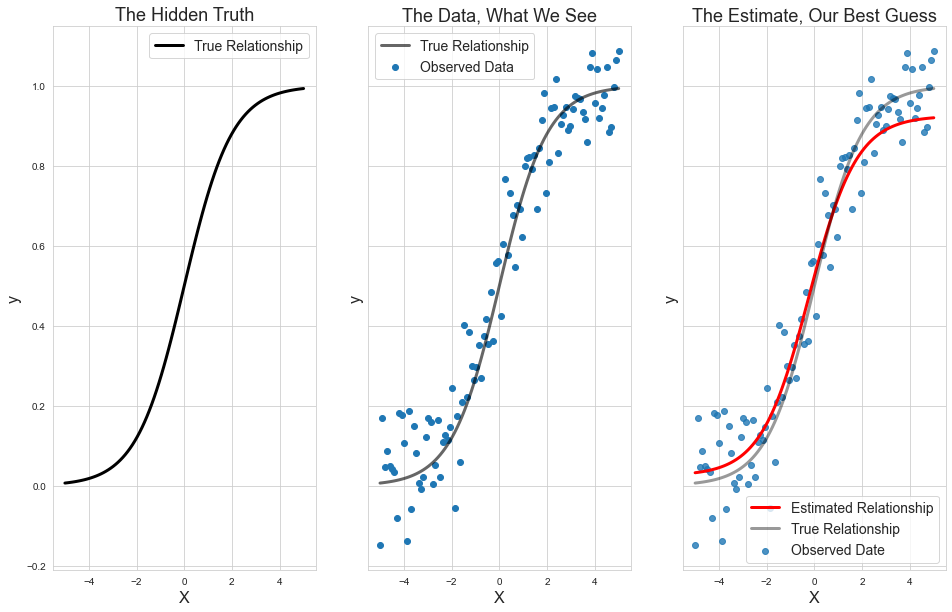

In [3]:
## You can ignore this code, I'm just making some illustrative plots

## plot the data
## make the figure
fig,ax = plt.subplots(1,3,figsize = (16,10),sharey=True)

## plot the truth
ax[0].plot(x,1/(1+np.exp(-x)),linewidth=3,c='k',alpha=1,label="True Relationship")

## plot the data and the truth in the middle
ax[1].plot(x,1/(1+np.exp(-x)),linewidth=3,c='k',alpha=.6,label="True Relationship")
ax[1].scatter(x,y,label = "Observed Data")

## plot a sample estimate function on right
ax[2].plot(x,.9/(1+.8*np.exp(-x))+.025,linewidth = 3,c='r',label="Estimated Relationship")
ax[2].plot(x,1/(1+np.exp(-x)),linewidth=3,c='k',alpha=.4,label="True Relationship")
ax[2].scatter(x,y,alpha=.8,label = "Observed Date")

## Set titles and label
ax[0].set_title("The Hidden Truth",fontsize=18)
ax[0].set_xlabel("X",fontsize=16)
ax[0].set_ylabel("y",fontsize=16)

ax[1].set_title("The Data, What We See",fontsize=18)
ax[1].set_xlabel("X",fontsize=16)
ax[1].set_ylabel("y",fontsize=16)

ax[2].set_title("The Estimate, Our Best Guess",fontsize=18)
ax[2].set_xlabel("X",fontsize=16)
ax[2].set_ylabel("y",fontsize=16)

## Add legends
ax[0].legend(fontsize=14)
ax[1].legend(fontsize=14)
ax[2].legend(fontsize=14)

plt.show()

Our goal is to get as close as we can to the true relationship using the data we collect. We often call the estimate of the relationship $\hat{f}$. The <i>best we can</i> depends upon which of the two modeling tasks we're performing.

## Explanatory Modeling

With explanatory modeling we would like to understand why the data is the way it is. This is what is used in many scientific studies, but it also has a place in industry settings.

For example, perhaps you are contracted out by a company to analyze data on workplace accidents. Using the data they provide you can build statistical models to analyze associations among the data that suggest the cause of these accidents. Your models could then be used to come up with changes aimed at preventing future accidents.

Common tasks in this setting involve:
- performing hypothesis tests,
- choosing an appropriate statistical model,
- building confidence intervals,
- looking for statistically significant variables.

For the purposes of explanatory modeling <i>best</i> fitting the data means explaining as much of the variance in the data as possible while maintaining a parsimonious model.

The techniques of explanatory modeling are most often covered statistics courses and may be familiar to some of you. We will still cover them in this course and show you how they can performed in python.

## Predictive Modeling

With predictive modeling our goal is to produce an $\hat{f}$ for the purposes of making predictions. This is used in many industry settings, and has only recently started to gain popularity in the academic sphere.

As a real world example consider the <a href="https://en.wikipedia.org/wiki/Netflix_Prize">Netflix prize</a> competition from the 2000s. In this competition Netflix released a large data set on user's movie ratings along with a reward of $1,000,000 for the team that could improve upon Netflix's recommendation algorithm by more than 10%.

Common tasks in this setting involve:
- performing training test splits,
- choosing an appropriate model,
- comparing generalization errors through cross-validation,
- hyper-parameter tuning,
- making predictions.

For the purposes of predictive modeling <i>best</i> fitting the data means providing the lowest possible generalization error, i.e. makes the best predictions on new data.

## Comparing the Two

Explanatory modeling and predictive modeling are quite similar, but there is a subtle difference. Sometimes the best predictive model does not do a good job of explaining the data. 

As an example we'll consider the winning team from the Netflix prize competition. When coming up with their winning solution, BellKor's Pragmatic Chaos team decided to leave out features that helped explain user behavior:

<q><i>We should mention  that  not  all  data  features  were  found  to  be  useful.  For  example,  we  tried  to  benefit  from  an  extensive set of attributes describing each of the movies in the dataset. Those attributes  certainly carry a significant  signal  and  can  explain  some  of  the  user  behavior. However, we concluded  that  they  could  not  helpat all for improving the accuracy of well tuned collaborative filtering models.</i></q>

The reason for this comes from the formula for the generalization error (more on that later) which shows a trade-off in model performance. It is possible that increasing the variance (explaining the data more poorly) can ultimately lead to an overall decrease in the generalization error.

### Both are Important!

While predictive modeling may be the <i>sexier</i> of the two (and a larger focus of this program) both are important tasks for a data scientist. When possible we will cover both. This will be certainly be the case in our current section, Regression.

## Reference

<a href="https://www.stat.berkeley.edu/~aldous/157/Papers/shmueli.pdf">https://www.stat.berkeley.edu/~aldous/157/Papers/shmueli.pdf</a>

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2021.

Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)